<a href="https://colab.research.google.com/github/hasancatalgol/churn_modelling/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
* [What is Churn Modelling?](#1)
* [Understanding the Background and Data](#2)
* [Libraries and modules used in the project](#3)
* [Data Manipulation](#4)
* [Data Exploration](#5)

<a id="1"></a>
# Churn Modelling 
![Image of Yaktocat](https://uruit.com/blog/wp-content/uploads/2020/11/Churn1-750x530.jpg)
## Customer Retention

## Overview

Our goal is to make groupings for customers that exist individually. Then it is to segment these groups. Finally, it is trying to determine which of these segments a new customer belongs to. **We won't be appling any machine learning algorithms to solve this problem.** Segmentation will be rule based and we will be defining those rules.


### Goal: 
Thinking about the concept of persona.
To be able to define new customers according to the levels.
Simply segment new customer definitions using the qcut function.
When a new customer arrives, classify them according to segments.




---
----
<a id="2"></a>
## Part One: Understanding the Background and Data


----

### The Data

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

#### Churn_Modelling.csv

-----

`Churn_Modelling.csv` contains characteristics of customers

Column | Definition | Type of Variable
:--- | :-----------: | :-----------------:
RowNumber | Rows of each customer | Numeric
CustomerId | Unique ID belonging to customers | Numeric
Surname | Last names of customers | Nominal
CreditScore | Credit card scores of customers | Numeric
Geograpgy | Countries where customers reside |Nominal
Gender | Assumed genders of customers |Nominal
Age |  Ages of customers | Numeric
Tenure |  Length of time an customer has worked for the company | Numeric
Balance |  Basic balance is the measure of inflows and outflows that takes the capital and current accounts into consideration. | Numeric
NumofProducts | Total number of products that the customer bought | Numeric
HasCrCard | Does the customer have credit card? (1 for yes, 0 for no) | Numeric
IsActiveMember | Related with customer's activity for a previously defined period of time | Numeric
EstimatedSalary | Estimated salary of the customer | Numeric
Exited | Churn condition of the customer | Numeric

**Import libraries**

In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.neighbors import LocalOutlierFactor

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)

In [13]:
df=pd.read_csv("https://github.com/hasancatalgol/churn_modelling/raw/main/Data/Churn_Modelling.csv")

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


## Part Two: Data Manipulation

Secondly let's mold the data into something more suitable for our Machine&Deep Learning algorytms.

----
**Drop the 'RowNumber', 'CustomerId' and 'Surname' variables**

In [16]:
df.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


----

**One Hot Encoder to deal with Nominal/Categorical variables**

In [19]:
df = pd.get_dummies(prefix='GeoDum', data=df, columns=['Geography'])
df = pd.get_dummies(prefix='GenDum', data=df, columns=['Gender'])

pd.get_dummies also removes previous variables 

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GeoDum_France,GeoDum_Germany,GeoDum_Spain,GenDum_Female,GenDum_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


In [21]:
df.isnull()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GeoDum_France,GeoDum_Germany,GeoDum_Spain,GenDum_Female,GenDum_Male
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Part Three: Exploring Data Frame

Let's first explore our dataframe and ask relevant questions to understand both tables much better

In [22]:
# OUTLIERS
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.05)
    quartile3 = dataframe[col_name].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


**How many unique customers are in the dataset?**

In [23]:
len(df)

10000

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>,
        <Axes: title={'center': 'GeoDum_France'}>,
        <Axes: title={'center': 'GeoDum_Germany'}>,
        <Axes: title={'center': 'GeoDum_Spain'}>],
       [<Axes: title={'center': 'GenDum_Female'}>,
        <Axes: title={'center': 'GenDum_Male'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 960x720 with 0 Axes>

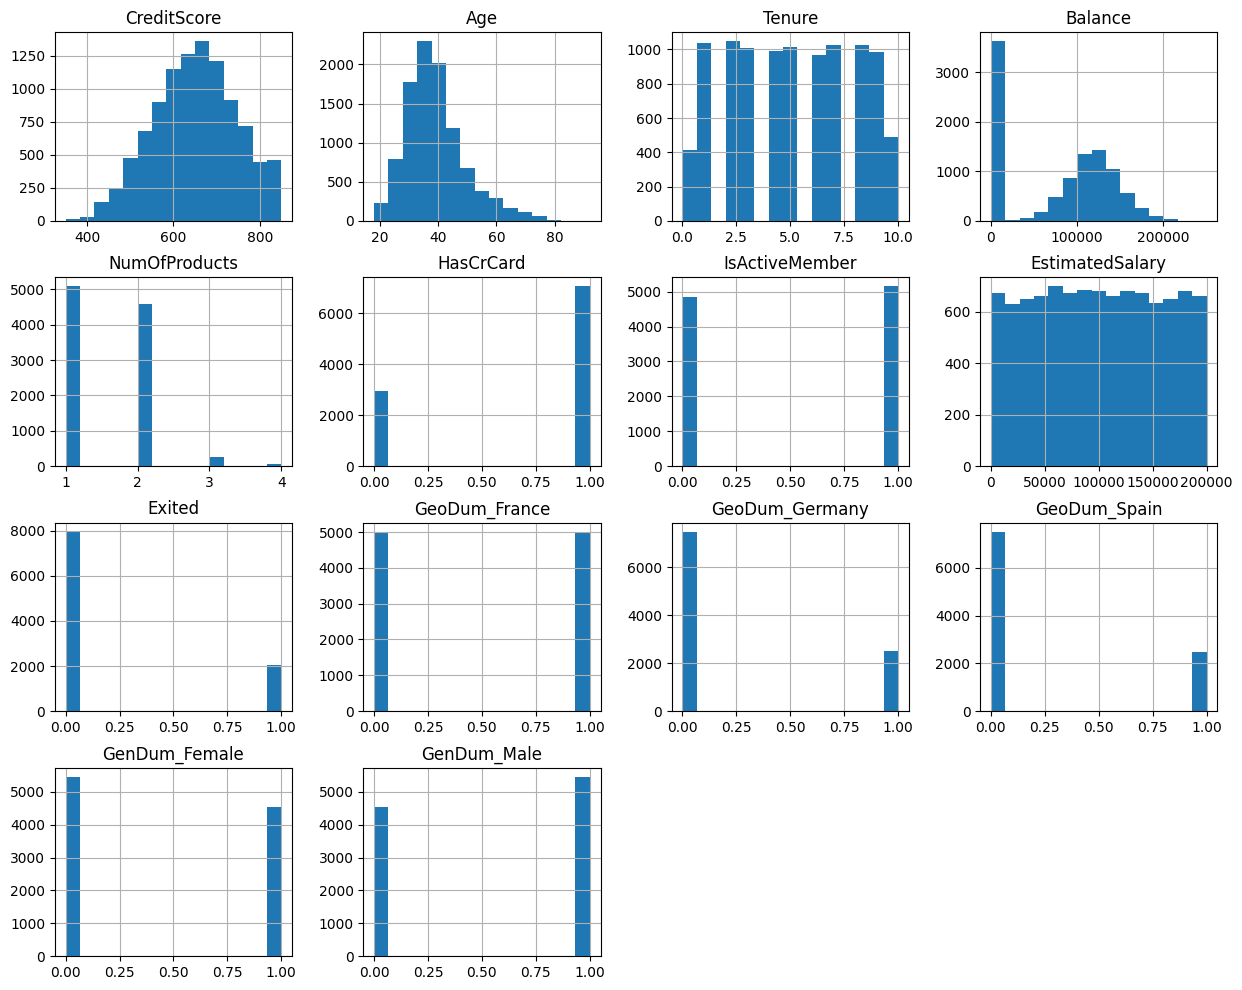

In [24]:
plt.figure(dpi=150)
df.hist(figsize=(15,12),bins = 15)

<AxesSubplot:>

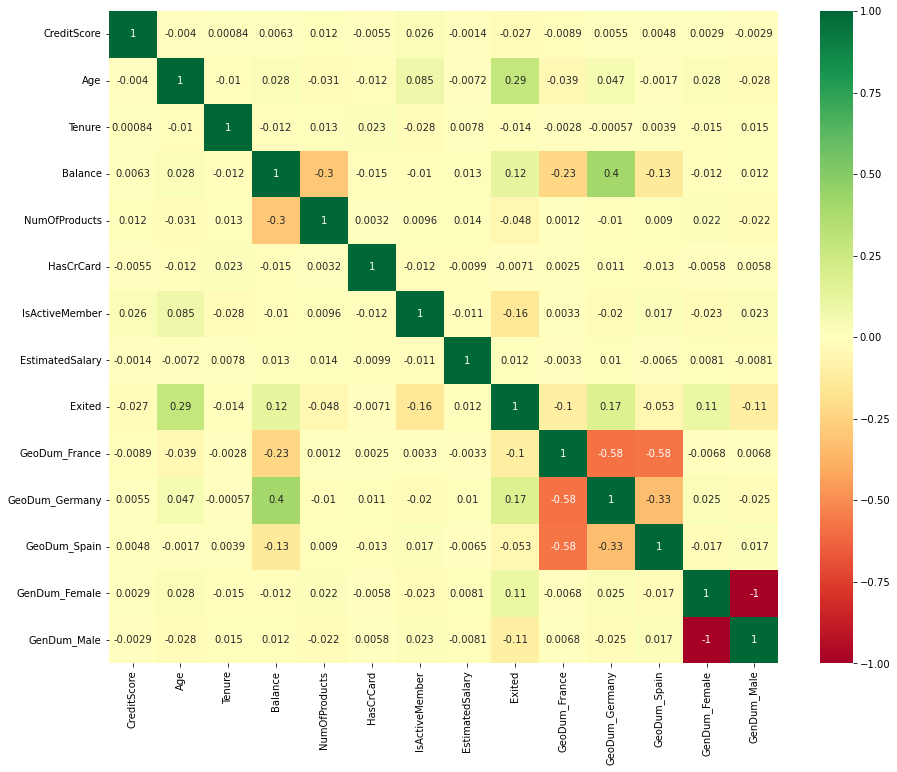

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

<Axes: >

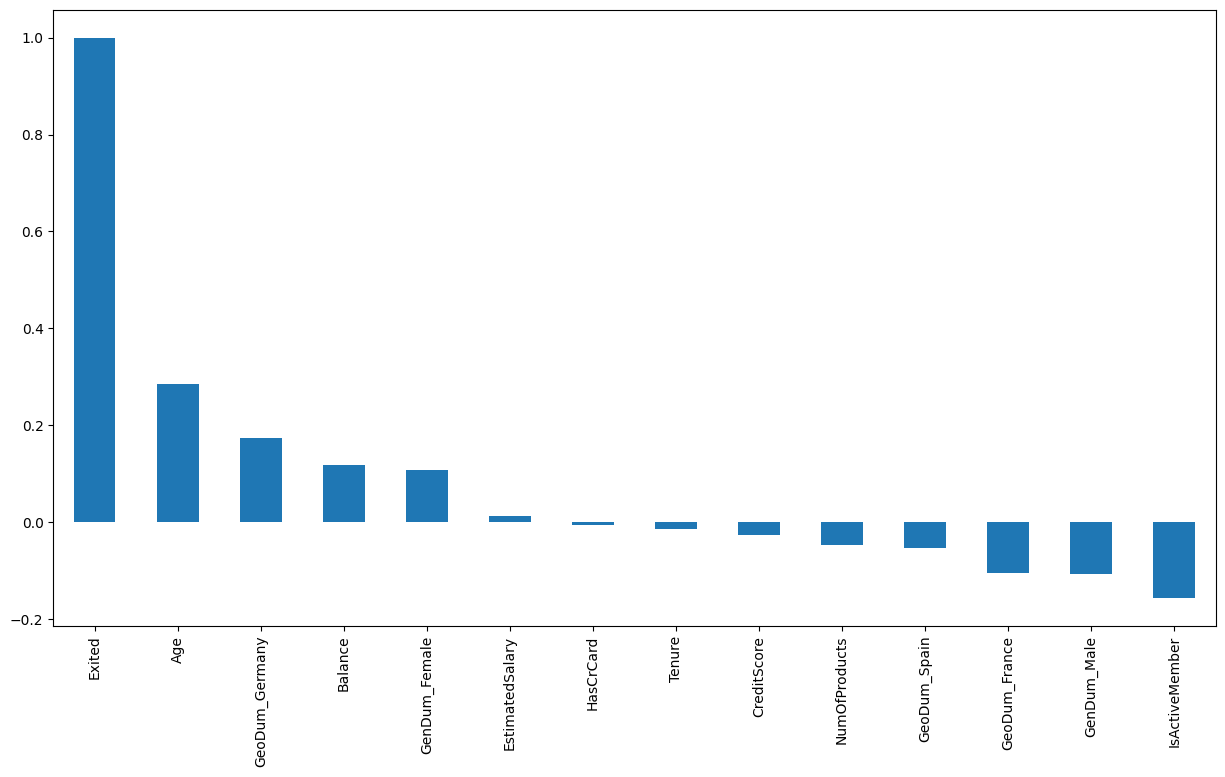

In [25]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')